In [1]:
import pandas as pd

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = '/content/drive/MyDrive/DJ Project /CSV_files/music_df.csv'
df = pd.read_csv(dataset_path)
df.head()

,Search_Title,Style,Vibe,Energy,Groove,mfcc_0_mean,mfcc_0_std,mfcc_1_mean,mfcc_1_std,mfcc_2_mean,...,chroma_7_mean,chroma_8_mean,chroma_9_mean,chroma_10_mean,chroma_11_mean,tempo,rms_mean,rms_std,spectral_bandwidth_mean,spectral_bandwidth_std
0,A Trip To N.Y. - Yellow Taxi Track,"Breaks, Deep House, Funky",uplifting,3 - Body,riding,-435.458000,103.70662,98.55289,76.240450,14.527328,...,0.356278,0.324782,0.340963,0.376483,0.334606,[75.99954044],0.029973,0.026621,1592.205225,969.524159
1,AD Bourke - OSTIA 1982,"Breaks, Funky",dreamy,3 - Body,bouncy,-132.140010,65.64780,53.63090,24.940865,19.351046,...,0.539017,0.551914,0.509673,0.460667,0.485687,[123.046875],0.102988,0.076133,3272.370153,309.552809
2,Alland Byallo - Ready to Go (Instrumental),"Breaks, Deep House, Funky","deep, floaty",4 - Drive,riding,-282.012760,79.63340,93.77660,42.435917,63.560320,...,0.484760,0.620386,0.726323,0.829506,0.636247,[172.265625],0.219142,0.094188,1807.893844,541.827247
3,Andrija - Ljetnikovac (Deep Summer House),"Breaks, Funky",uplifting,2 - Mellow,wavey,-230.529650,73.57187,91.10995,29.107836,1.761370,...,0.635367,0.626707,0.547679,0.519477,0.498693,[117.45383523],0.078388,0.068359,2203.663145,599.313590
4,Anthony Shakir - Roaming,"Breaks, Funky","floaty, trippy",3 - Body,"bouncy, riding",-125.026955,55.13540,91.88513,25.963697,1.175979,...,0.436044,0.410149,0.304253,0.427151,0.350693,[61.5234375],0.102302,0.069482,2724.296019,615.582852


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Search_Title             195 non-null    object 
 1   Style                    195 non-null    object 
 2   Vibe                     195 non-null    object 
 3   Energy                   195 non-null    object 
 4   Groove                   195 non-null    object 
 5   mfcc_0_mean              195 non-null    float64
 6   mfcc_0_std               195 non-null    float64
 7   mfcc_1_mean              195 non-null    float64
 8   mfcc_1_std               195 non-null    float64
 9   mfcc_2_mean              195 non-null    float64
 10  mfcc_2_std               195 non-null    float64
 11  mfcc_3_mean              195 non-null    float64
 12  mfcc_3_std               195 non-null    float64
 13  mfcc_4_mean              195 non-null    float64
 14  mfcc_4_std               1

In [5]:
# prompt: preprocess df for a label classification model on 'Style', 'Energy', 'Groove', 'Vibe' columns each label column is multiclass classification, for example, 'Style' have categories labels Breaks, Deep, House, and each sample may have one or more of these categories, use one hot encoding for each column ,other column are features except the Search_Title, Search_Title doesn't matter in X features but at the end we should know which music was classified to which categories,

import pandas as pd
# Preprocessing function
def preprocess_multilabel(df, label_columns, exclude_columns):
    # Separate labels and features, keeping track of original index/title
    X = df.drop(columns=label_columns + exclude_columns)
    y_df = df[label_columns]
    search_titles = df['Search_Title'] # Keep track of search titles

    # One-hot encode each label column independently
    y_encoded = {}
    for col in label_columns:
        # Split the string of labels into a list, handle potential NaN or empty strings
        y_df[col] = y_df[col].apply(lambda x: [l.strip() for l in str(x).split(',') if l.strip()] if pd.notna(x) else [])
        # Create a list of all unique labels in this column
        all_labels = [item for sublist in y_df[col] for item in sublist]
        unique_labels = sorted(list(set(all_labels))) # Sort for consistent column order

        # Create one-hot encoded DataFrame for this column
        encoded_col = pd.DataFrame(0, index=y_df.index, columns=[f'{col}_{label}' for label in unique_labels])

        # Set the value to 1 for each label present in the original cell
        for i, row in y_df.iterrows():
            for label in row[col]:
                if f'{col}_{label}' in encoded_col.columns:
                    encoded_col.loc[i, f'{col}_{label}'] = 1

        y_encoded[col] = encoded_col

    # Concatenate the one-hot encoded label DataFrames
    y = pd.concat(y_encoded.values(), axis=1)

    return X, y, search_titles

# Define label columns and columns to exclude from features
label_columns = ['Style', 'Energy', 'Groove', 'Vibe']
exclude_columns = ['Search_Title', 'tempo'] # Search_Title is explicitly excluded from features

# Apply the preprocessing function
X, y, search_titles = preprocess_multilabel(df.copy(), label_columns, exclude_columns)

# Display the first few rows of X and y to verify
print("Features (X):")
print(X.head())
print(X.shape)

print("\nLabels (y - one-hot encoded):")
print(y.head())
print(y.shape)

print("\nSearch Titles:")
print(search_titles.head())


Features (X):
   mfcc_0_mean  mfcc_0_std  mfcc_1_mean  mfcc_1_std  mfcc_2_mean  mfcc_2_std  \
0  -435.458000   103.70662     98.55289   76.240450    14.527328   32.612953   
1  -132.140010    65.64780     53.63090   24.940865    19.351046   22.042177   
2  -282.012760    79.63340     93.77660   42.435917    63.560320   32.216710   
3  -230.529650    73.57187     91.10995   29.107836     1.761370   25.916742   
4  -125.026955    55.13540     91.88513   25.963697     1.175979   15.684103   

   mfcc_3_mean  mfcc_3_std  mfcc_4_mean  mfcc_4_std  ...  chroma_6_mean  \
0    14.086999   33.815018    -1.038327   25.919775  ...       0.399706   
1     6.215509   19.941338     5.542946   14.664757  ...       0.571933   
2    79.275490   24.184460    13.760981   11.878079  ...       0.422215   
3    49.716145   17.038376     5.837644   11.960933  ...       0.574296   
4     2.560110   10.678720     2.167844    8.502240  ...       0.409348   

   chroma_7_mean  chroma_8_mean  chroma_9_mean  chroma

<ipython-input-5-3574675469>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_df[col] = y_df[col].apply(lambda x: [l.strip() for l in str(x).split(',') if l.strip()] if pd.notna(x) else [])


In [6]:
# prompt: train a random forest with n =100 trees on the dataset

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, hamming_loss
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base model (Random Forest Classifier)
rf = RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1)

# Wrap the base model in a MultiOutputClassifier
multi_output_rf = MultiOutputClassifier(rf, n_jobs=-1)

# Train the multi-output Random Forest model
print("Training the model...")
multi_output_rf.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the test set
y_pred = multi_output_rf.predict(X_test)

# Evaluate the model
# For multi-label classification, common metrics include Hamming Loss and Jaccard Score
# Hamming Loss is the fraction of labels that are incorrectly predicted. Lower is better.
hamming_loss_score = hamming_loss(y_test, y_pred)
print(f"Hamming Loss: {hamming_loss_score:.4f}")

# You can also evaluate for each individual label if needed
# For example, accuracy for each label
label_accuracies = []
for i in range(y.shape[1]):
    label_accuracy = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    label_accuracies.append(label_accuracy)
    print(f"Accuracy for label '{y.columns[i]}': {label_accuracy:.4f}")

print(f"\nAverage Accuracy across labels: {np.mean(label_accuracies):.4f}")

# Note: For evaluating individual predictions, you might need to convert the predictions back to labels
# This can be complex with the current one-hot encoding setup but can be done if needed.


Training the model...
Training complete.
Hamming Loss: 0.2189
Accuracy for label 'Style_Acid': 0.9231
Accuracy for label 'Style_Breaks': 0.6154
Accuracy for label 'Style_Bruk': 0.9744
Accuracy for label 'Style_Deep House': 0.4872
Accuracy for label 'Style_Disco': 0.9744
Accuracy for label 'Style_Electro': 0.5641
Accuracy for label 'Style_Funky': 0.6410
Accuracy for label 'Style_Garage': 1.0000
Accuracy for label 'Style_House': 0.8718
Accuracy for label 'Style_Minimal': 0.9744
Accuracy for label 'Style_Tech House': 0.6410
Accuracy for label 'Style_Trance': 1.0000
Accuracy for label 'Energy_2 - Mellow': 0.7692
Accuracy for label 'Energy_3 - Body': 0.4359
Accuracy for label 'Energy_4 - Drive': 0.7179
Accuracy for label 'Energy_5 - Peak Time': 0.9744
Accuracy for label 'Groove_bouncy': 0.6667
Accuracy for label 'Groove_riding': 0.8205
Accuracy for label 'Groove_rolling': 0.7949
Accuracy for label 'Groove_wavey': 0.8462
Accuracy for label 'Vibe_cheeky': 0.6667
Accuracy for label 'Vibe_deep'


Analyzing Label Distribution:
Counts per label:
Groove_bouncy           110
Vibe_floaty             105
Style_Funky              98
Style_Tech House         94
Style_Breaks             91
Energy_3 - Body          91
Style_Deep House         89
Style_Electro            68
Vibe_dreamy              68
Groove_riding            67
Energy_2 - Mellow        58
Vibe_cheeky              55
Energy_4 - Drive         44
Vibe_deep                38
Groove_wavey             37
Groove_rolling           33
Vibe_serious             20
Vibe_uplifting           18
Vibe_trippy              16
Style_House              15
Vibe_sunny               12
Style_Acid               10
Style_Minimal             8
Style_Bruk                6
Style_Trance              2
Energy_5 - Peak Time      2
Style_Disco               1
Style_Garage              1
dtype: int64


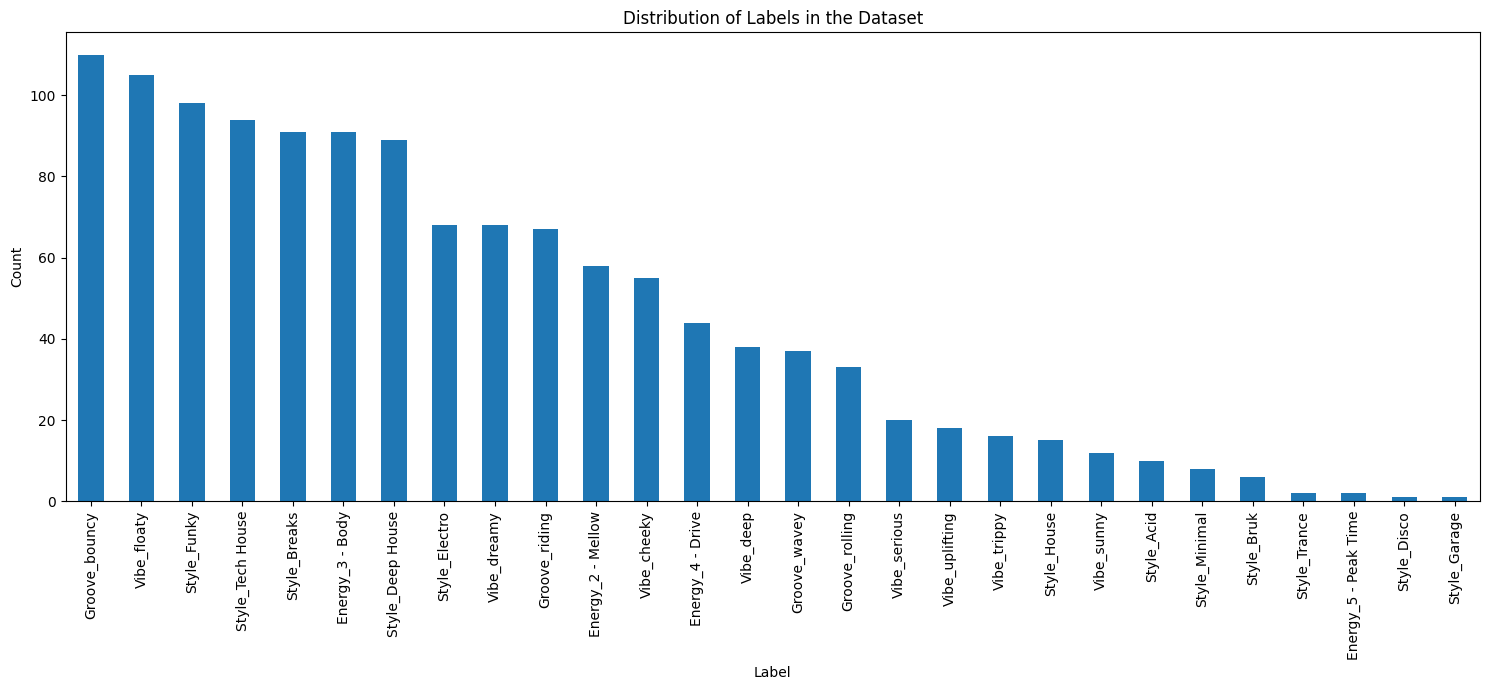


Inverse Label Frequency (higher indicates rarer label):
Style_Garage            4.579852
Style_Disco             4.579852
Style_Trance            4.174387
Energy_5 - Peak Time    4.174387
Style_Bruk              3.327089
Style_Minimal           3.075775
Style_Acid              2.875104
Vibe_sunny              2.708050
Style_House             2.500411
Vibe_trippy             2.439786
Vibe_uplifting          2.328561
Vibe_serious            2.228477
Groove_rolling          1.746639
Groove_wavey            1.635413
Vibe_deep               1.609438
Energy_4 - Drive        1.466337
Vibe_cheeky             1.247648
Energy_2 - Mellow       1.195462
Groove_riding           1.053492
Style_Electro           1.038893
Vibe_dreamy             1.038893
Style_Deep House        0.773190
Style_Breaks            0.751211
Energy_3 - Body         0.751211
Style_Tech House        0.719123
Style_Funky             0.677880
Vibe_floaty             0.609560
Groove_bouncy           0.563469
dtype: float64

Lab

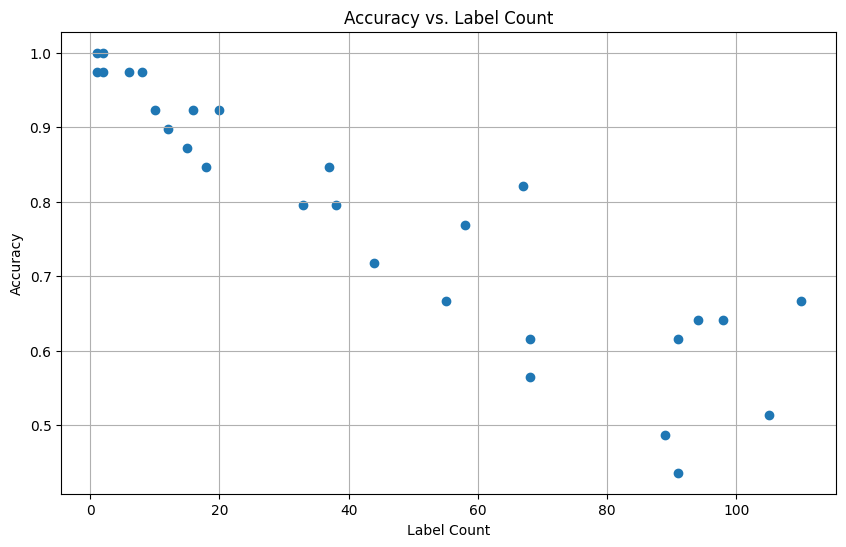


Micro F1-score: 0.4069
Macro F1-score: 0.1657


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# prompt: analyze model performance based on the unblancity that acures in labels

import pandas as pd
import numpy as np
# Analyze label unbalance
print("\nAnalyzing Label Distribution:")
label_counts = y.sum(axis=0).sort_values(ascending=False)
print("Counts per label:")
print(label_counts)

# You can visualize this distribution using a bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Calculate the inverse document frequency (IDF) or inverse label frequency to understand imbalance
# This can give an idea of how rare a label is
# IDF = log(N / (1 + frequency of label))
N = len(y) # Total number of samples
label_frequencies = y.sum(axis=0)
# Add a small number to avoid division by zero if a label has 0 frequency
inverse_label_frequency = np.log(N / (1 + label_frequencies))

print("\nInverse Label Frequency (higher indicates rarer label):")
print(inverse_label_frequency.sort_values(ascending=False))

# How does imbalance relate to performance?
# Check performance on the most frequent vs. least frequent labels
# We already calculated accuracy per label, let's see if there's a correlation
performance_df = pd.DataFrame({
    'Accuracy': label_accuracies
}, index=y.columns)

# Combine with label counts and inverse frequency
analysis_df = pd.concat([label_counts.rename('Count'),
                         inverse_label_frequency.rename('Inverse_Frequency'),
                         performance_df], axis=1)

print("\nLabel Analysis with Performance:")
print(analysis_df.sort_values(by='Count', ascending=False))

# Plotting accuracy vs. label count might reveal patterns
plt.figure(figsize=(10, 6))
plt.scatter(analysis_df['Count'], analysis_df['Accuracy'])
plt.title('Accuracy vs. Label Count')
plt.xlabel('Label Count')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Considerations based on unbalance:
# 1. Rare labels might have lower prediction accuracy due to fewer training examples.
# 2. Metrics like Hamming Loss might be dominated by performance on frequent labels.
# 3. For highly unbalanced datasets, consider alternative metrics like F1-score (macro or micro), Jaccard score,
#    or focusing on precision/recall for rare labels.
# 4. Resampling techniques (oversampling rare labels, undersampling frequent labels) or
#    using class weights in the model training might help mitigate unbalance issues.

# Example of calculating F1-score (using average='micro' and 'macro')
from sklearn.metrics import f1_score

# Micro F1: Calculate F1 globally by counting total true positives, false negatives, and false positives.
# Favors performance on frequent labels.
micro_f1 = f1_score(y_test, y_pred, average='micro')
print(f"\nMicro F1-score: {micro_f1:.4f}")

# Macro F1: Calculate F1 for each label, and find their unweighted mean.
# Gives equal weight to each label, regardless of frequency. More sensitive to performance on rare labels.
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1-score: {macro_f1:.4f}")

# If Macro F1 is significantly lower than Micro F1, it indicates that the model performs much worse on rare labels.



In [ ]:

# prompt: create a dataset similar to the primary music_df using predicted values from traiend model

import pandas as pd
import numpy as np
# The trained model is `multi_output_rf` and the test features are `X_test`.
# We already have the predictions on the test set in `y_pred`.

# Convert the predicted one-hot encoded labels back to original label format for each column.
def decode_multilabel_predictions(y_pred_array, y_columns, label_columns):
    predicted_labels = {}
    current_col_idx = 0
    for col_name in label_columns:
        # Find the columns in y_pred_array that belong to the current label column
        col_indices = [i for i, name in enumerate(y_columns) if name.startswith(f'{col_name}_')]
        if not col_indices:
          print(f"Warning: No columns found for label '{col_name}' in prediction output.")
          predicted_labels[col_name] = [''] * y_pred_array.shape[0] # Add empty list for missing labels
          continue

        # Get the names of the specific labels for this column (e.g., 'Style_Techno', 'Style_House')
        specific_label_names = [y_columns[i] for i in col_indices]
        # Remove the prefix to get the actual label value (e.g., 'Techno', 'House')
        actual_labels = [name.replace(f'{col_name}_', '') for name in specific_label_names]

        # Extract the predicted one-hot encoded part for this column
        y_pred_col = y_pred_array[:, col_indices]

        # Decode the one-hot predictions back into a list of labels for each instance
        decoded_col_labels = []
        for row_pred in y_pred_col:
            # Find the indices where the prediction is 1
            active_label_indices = np.where(row_pred == 1)[0]
            # Get the corresponding actual label names
            decoded_row_labels = [actual_labels[i] for i in active_label_indices]
            # Join the labels with comma (similar to original format)
            decoded_col_labels.append(','.join(decoded_row_labels))

        predicted_labels[col_name] = decoded_col_labels

    return pd.DataFrame(predicted_labels)


# Get the column names from the original one-hot encoded labels (y)
y_column_names = y.columns.tolist()

# Decode the predictions
predicted_labels_df = decode_multilabel_predictions(y_pred, y_column_names, label_columns)

# The predicted labels are currently based on the test set (X_test and y_test).
# We need to get the corresponding features (X_test) and original titles for these predictions.

# Reset index of X_test to easily concatenate with predicted_labels_df
X_test_reset = X_test.reset_index(drop=True)

# The search_titles variable contains titles for the *entire* original dataframe.
# We need the titles corresponding only to the *test* set.
# The `train_test_split` function returns subsets of the original data, preserving the original index.
# We can use the index of X_test (or y_test) to select the corresponding search titles.
test_indices = X_test.index
test_search_titles = search_titles.loc[test_indices].reset_index(drop=True)


# Create the new dataframe similar to the primary music_df
# It should include the features from X_test, the predicted labels, and the search titles for the test set.
# Ensure the columns are in a logical order. Let's aim for something similar to the original df order.

# Get the original column order for features that are in X_test
original_feature_order = [col for col in df.columns if col in X_test.columns]

# Create the new dataframe
# Start with search titles
predicted_df = pd.DataFrame({'Search_Title': test_search_titles})

# Add features from X_test in their approximate original order
for feature_col in original_feature_order:
    predicted_df[feature_col] = X_test_reset[feature_col]

# Add the predicted label columns
for label_col in label_columns:
    predicted_df[label_col] = predicted_labels_df[label_col]

# Add other excluded columns if needed and available in the test set portion of the original df.
# For example, 'tempo' was excluded from features but is in the original df.
# We can get the 'tempo' for the test set based on the original index.
if 'tempo' in exclude_columns and 'tempo' in df.columns:
    test_tempo = df.loc[test_indices, 'tempo'].reset_index(drop=True)
    predicted_df['tempo'] = test_tempo

# Rearrange columns to match the original df structure more closely
# Let's assume the original order was something like: Search_Title, Features, Labels, tempo
# We'll construct a desired order based on the original df columns
desired_order = ['Search_Title'] + original_feature_order + label_columns + ([col for col in exclude_columns if col != 'Search_Title' and col in df.columns])

# Ensure all columns in predicted_df are in the desired order
existing_cols = predicted_df.columns.tolist()
final_order = [col for col in desired_order if col in existing_cols]

# Reindex the DataFrame to the final desired order
predicted_df = predicted_df[final_order]


# Display the first few rows of the new dataframe
print("\nNew DataFrame based on Predicted Values (Test Set):")
print(predicted_df.head())

# Display info about the new dataframe
print("\nInfo of the new DataFrame:")
predicted_df.info()

In [19]:
# prompt: drop all columns from predicted_df except 'Style', 'Energy', 'Groove', 'Vibe', 'Search_Title',

columns_to_keep = ['Style', 'Energy', 'Groove', 'Vibe', 'Search_Title']
predicted_df = predicted_df[columns_to_keep]

# Display the first few rows of the modified dataframe
print("\nDataFrame with selected columns:")
print(predicted_df.head())

# Display info about the modified dataframe
print("\nInfo of the modified DataFrame:")
predicted_df.info()



DataFrame with selected columns:
                         Style    Energy  Groove    Vibe  \
0             Deep House,Funky                    floaty   
1                        Funky  3 - Body  bouncy           
2                 Breaks,Funky  3 - Body  bouncy           
3  Deep House,Funky,Tech House  3 - Body  bouncy  floaty   
4             Funky,Tech House  3 - Body  bouncy  dreamy   

                                Search_Title  
0                 Metro Area - Machine Vibes  
1  Black Science Orchestra - New Jersey Deep  
2                  Deemphasis - My Territory  
3                      Pedro Cali - Patiente  
4              Daniel De Bohan - Bliss Abyss  

Info of the modified DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Style         39 non-null     object
 1   Energy        39 non-null     object
 2   Groove        3

In [20]:
predicted_df.head()

,Style,Energy,Groove,Vibe,Search_Title
0,"Deep House,Funky",,,floaty,Metro Area - Machine Vibes
1,Funky,3 - Body,bouncy,,Black Science Orchestra - New Jersey Deep
2,"Breaks,Funky",3 - Body,bouncy,,Deemphasis - My Territory
3,"Deep House,Funky,Tech House",3 - Body,bouncy,floaty,Pedro Cali - Patiente
4,"Funky,Tech House",3 - Body,bouncy,dreamy,Daniel De Bohan - Bliss Abyss
